<a href="https://colab.research.google.com/github/Honmaru0/Aprender/blob/master/Torpedo_de_plaina_limadora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A questão envolve entender o movimento do mecanismo abaixo. O mecanismo é um torpedo de uma plaina limadora.

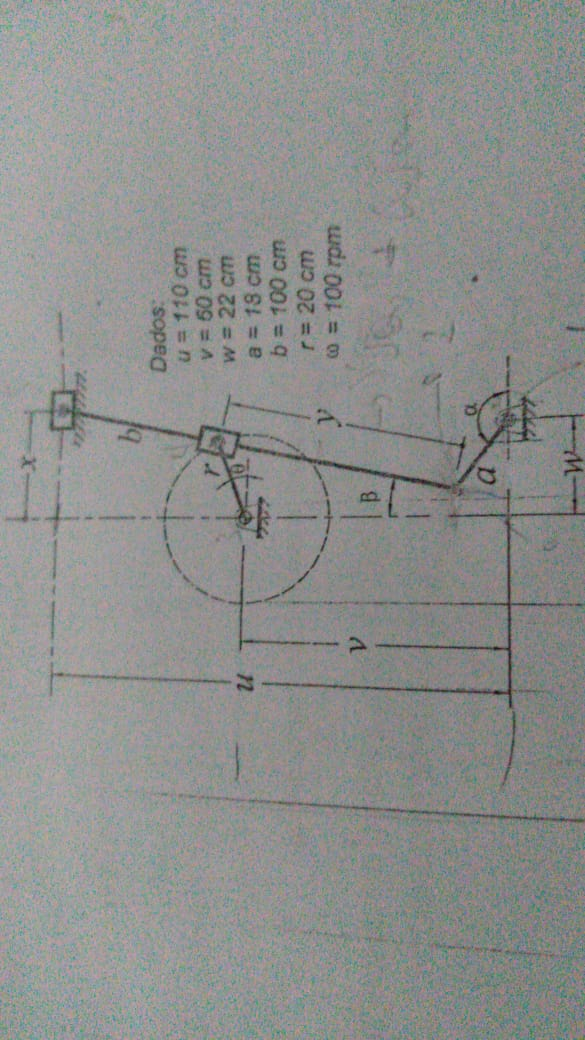

In [20]:
from IPython.display import Image
Image('Plaina_limadora.jpeg')

 O primeiro passo para solucionar este problema é obter as equações de restrição. Dado que as coordenadas principais são: $\alpha,\beta,y,x$ , sendo $\theta$ a variável de entrada. Com 5 variáveis no total, e um grau de liberdade, precisa-se de 4 equações, as quais são:

>$x - bsen(\beta) + acos(\pi-\alpha) - w = 0$

>$-bcos(\beta) - asen(\pi-\alpha) + u = 0$

>$rcos(\theta) - ysen(\beta) + acos(\pi-\alpha) -w  = 0$

>$rsen(\theta) - ycos(\beta) - asen(\pi-\alpha) + v =0$

Infelizmente, a solução analítica desse sistema de equações é inviável. Tive que recorrer a métodos numéricos. Utilizei o MATLAB para calcular, e eu tive problemas de convergência durante a aplicação dos métodos, porque o algorítmo de Newton-Raphson convergiu para valores não-físicos. No mais, irei melhorar o programa quando tiver tempo, ou caso você mesmo queira melhorar, será um esforço apreciável.

Aqui, precisei instalar a biblioteca celluloid, para gerar o gif.

In [0]:
pip install celluloid

Segue abaixo o código utilzado para fazer a animação:

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from celluloid import Camera
data = pd.read_excel('plaina.xlsx')
x = data.iloc[:,0].values.reshape(600,1)
y = data.iloc[:,1].values.reshape(600,1)
alpha = data.iloc[:,2].values.reshape(600,1)
beta = data.iloc[:,3].values.reshape(600,1)
theta = data.iloc[:,4].values.reshape(600,1)
u =1.1
v = 0.6
w = 0.22
a = 0.18
b = 1
r = 0.2
fig = plt.figure()
camera = Camera(fig)
for i in range(0,600):
    p0= [w ,0]
    p1 =[w - a*math.cos(alpha[i,0]),a*math.sin(alpha[i,0])]
    p2 = [0, v]
    p3 = [r*math.cos(theta[i,0]), y[i,0]*math.cos(beta[i,0]) + a*math.sin(alpha[i,0])]
    p4 = [x[i,0],u]

    x_v = [p0[0],p1[0]]
    y_v = [p0[1], p1[1]]
    plt.plot(x_v,y_v, color = 'black')
    
    x_v = [p1[0],p4[0]]
    y_v = [p1[1], p4[1]]
    plt.plot(x_v,y_v, color = 'black')
    
    x_v = [p2[0],p3[0]]
    y_v = [p2[1], p3[1]]
    plt.plot(x_v,y_v, color = 'black')
    
    #MARCADORES
    plt.scatter(p4[0],p4[1], color = 'red',marker = '+')
    plt.scatter(p2[0],p2[1], color = 'red',marker = '+')
    plt.scatter(p0[0],p0[1], color = 'red',marker = '+')
    
    #PLOTAR RETANGULO
    #PARTE 1
    
    x_v = [p4[0]-0.05,p4[0]-0.05]
    y_v = [p4[1]-0.05, p4[1]+0.05]
    plt.plot(x_v,y_v, color = 'black')
    #PARTE 2
    x_v = [p4[0]-0.05,p4[0]+0.05]
    y_v = [p4[1]+0.05, p4[1]+0.05]
    plt.plot(x_v,y_v, color = 'black')
    #PARTE 3
    x_v = [p4[0]+0.05,p4[0]+0.05]
    y_v = [p4[1]+0.05, p4[1]-0.05]
    plt.plot(x_v,y_v, color = 'black')
    #PARTE 4
    x_v = [p4[0]-0.05,p4[0]+0.05]
    y_v = [p4[1]-0.05, p4[1]-0.05]
    plt.plot(x_v,y_v, color = 'black')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5,1.5)
    plt.xlabel('x(m)')
    plt.ylabel('y(m)')
    plt.title("Simulação do torpedo da plaina limadora")
    camera.snap()
animation = camera.animate() 


Por algum motivo, a linha de código: animation = camera.animate() 
não funcionou para plotar a animação. De qualquer forma, melhorarei esse código futuramente. Por ora, apenas utilizei a função abaixo.

In [19]:
from IPython.display import HTML
HTML(animation.to_html5_video())

Percebe-se que há uma diferença no tamanho da barra ligada ao motor. Essa diferença ocorreu devido a problemas de convergência no algorítmo para resolver as equações de restrição.